In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import env
from wrangle import get_zillow_data, wrangle_zillow
%matplotlib inline

In [2]:
df = get_zillow_data()
df.head(2)

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None


In [3]:
df = wrangle_zillow(df)
df.head()

,bathrooms,bedrooms,sqft,county_code,latitude,longitude,lot_size,tax_value,logerror,county,age,tax_rate,price_per_sqft,abs_logerror
0,3,4,3100,6059,33634931.0,-117869207.0,4506,1023282,0.025595,Orange,23,0.010763,330,0.025595
1,1,2,1465,6111,34449266.0,-119281531.0,12647,464000,0.055619,Ventura,54,0.012225,316,0.055619
2,2,3,1243,6059,33886168.0,-117823170.0,8432,564778,0.005383,Orange,59,0.011488,454,0.005383
3,3,4,2376,6037,34245180.0,-118240722.0,13038,145143,-0.103410,Los Angeles,51,0.012247,61,0.103410
4,3,3,1312,6037,34185120.0,-118414640.0,278581,119407,0.006940,Los Angeles,57,0.012846,91,0.006940


In [4]:
df = df[['longitude', 'latitude', 'county_code']]
df.head(2)

,longitude,latitude,county_code
0,-117869207.0,33634931.0,6059
1,-119281531.0,34449266.0,6111


In [5]:
df['actual_latitude'] = df.latitude*.000001
df['actual_longitude'] = df.longitude*.000001

In [ ]:
df.head()

In [6]:
califas = gpd.read_file('/Users/hector/Desktop/tl_2019_06_prisecroads/tl_2019_06_prisecroads.shp')

<AxesSubplot:>

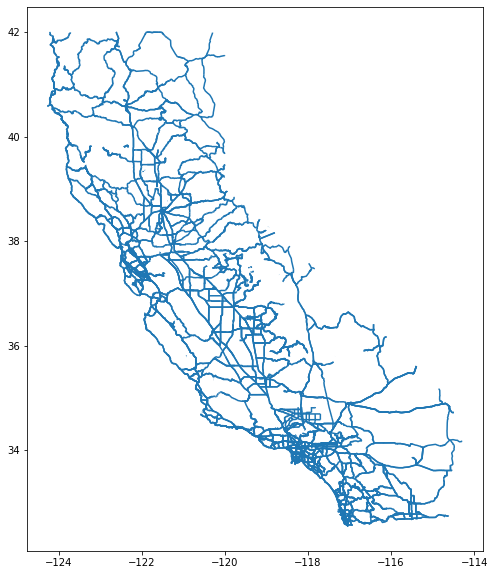

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
califas.plot(ax = ax)

In [8]:
geometry = [Point(xy) for xy in zip(df['actual_longitude'], df['actual_latitude'])]
geometry[:3]

In [9]:
geo_df = gpd.GeoDataFrame(df, crs = {'init':'epsg:4326'}, geometry = geometry)
geo_df.head()

,longitude,latitude,county_code,actual_latitude,actual_longitude,geometry
0,-117869207.0,33634931.0,6059,33.634931,-117.869207,POINT (-117.86921 33.63493)
1,-119281531.0,34449266.0,6111,34.449266,-119.281531,POINT (-119.28153 34.44927)
2,-117823170.0,33886168.0,6059,33.886168,-117.823170,POINT (-117.82317 33.88617)
3,-118240722.0,34245180.0,6037,34.245180,-118.240722,POINT (-118.24072 34.24518)
4,-118414640.0,34185120.0,6037,34.185120,-118.414640,POINT (-118.41464 34.18512)


In [13]:
geo_df.isnull().sum()

longitude           0
latitude            0
county_code         0
actual_latitude     0
actual_longitude    0
geometry            0
dtype: int64

(33.339527, 34.818767)

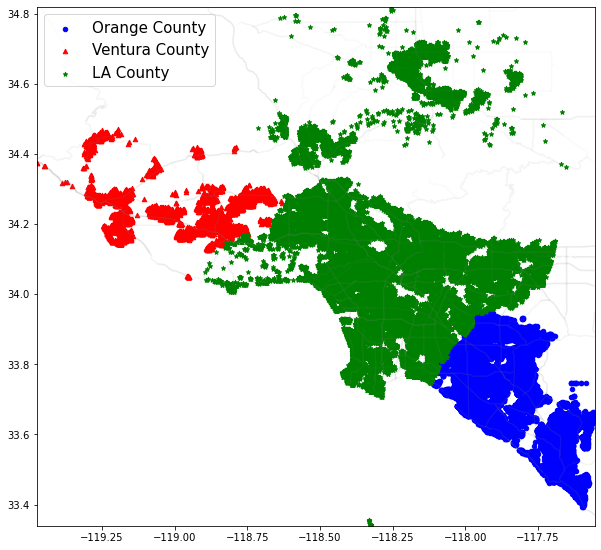

In [15]:
fig,ax = plt.subplots(figsize = (10,10))
califas.plot(ax = ax, alpha = .04, color = 'grey')
geo_df[geo_df['county_code'] == 6059].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Orange County')
geo_df[geo_df['county_code'] == 6111].plot(ax = ax, markersize = 20, color = 'red', marker = '^', label = 'Ventura County')
geo_df[geo_df['county_code'] == 6037].plot(ax = ax, markersize = 20, color = 'green', marker = '*', label = 'LA County')
plt.legend(prop = {'size': 15})

minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)